In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

#import numpy as np # linear algebra
#import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
  #  for filename in filenames:
    #    print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Harmful Brain Activity Classification


### ANUSHA REDDY
### UIN :01269581

In [2]:
import pandas as pd 
import numpy as np 

import matplotlib.pyplot as plt 
import seaborn as sns 

import tensorflow as tf 

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2024-04-24 23:20:31.337038: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-24 23:20:31.337148: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-24 23:20:31.492458: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [3]:
import warnings
warnings.filterwarnings('ignore')

### Load the train dataset

In [4]:
train_data = pd.read_csv("/kaggle/input/hms-harmful-brain-activity-classification/train.csv")

Display first 10 rows of train dataset

In [5]:
train_data.head(10)


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0
5,1628180742,5,26.0,353733,5,26.0,2413091605,42516,Seizure,3,0,0,0,0,0
6,1628180742,6,30.0,353733,6,30.0,364593930,42516,Seizure,3,0,0,0,0,0
7,1628180742,7,36.0,353733,7,36.0,3811483573,42516,Seizure,3,0,0,0,0,0
8,1628180742,8,40.0,353733,8,40.0,3388718494,42516,Seizure,3,0,0,0,0,0
9,2277392603,0,0.0,924234,0,0.0,1978807404,30539,GPD,0,0,5,0,1,5


In [6]:
train_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106800 entries, 0 to 106799
Data columns (total 15 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   eeg_id                            106800 non-null  int64  
 1   eeg_sub_id                        106800 non-null  int64  
 2   eeg_label_offset_seconds          106800 non-null  float64
 3   spectrogram_id                    106800 non-null  int64  
 4   spectrogram_sub_id                106800 non-null  int64  
 5   spectrogram_label_offset_seconds  106800 non-null  float64
 6   label_id                          106800 non-null  int64  
 7   patient_id                        106800 non-null  int64  
 8   expert_consensus                  106800 non-null  object 
 9   seizure_vote                      106800 non-null  int64  
 10  lpd_vote                          106800 non-null  int64  
 11  gpd_vote                          106800 non-null  i

In [7]:
#look for duplicate columns
train_data.duplicated().sum()


0

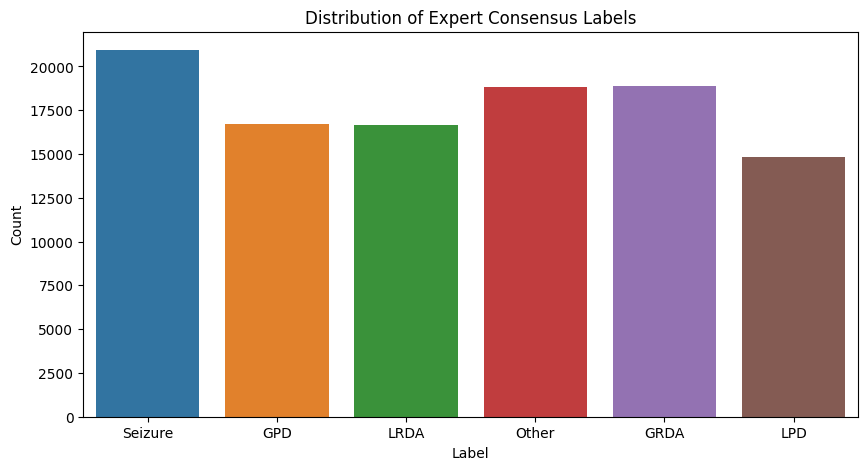

In [8]:
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='expert_consensus', data=train_data)
plt.title('Distribution of Expert Consensus Labels')
plt.xlabel('Label')
plt.ylabel('Count')
plt.show()


In [9]:
train_data.shape

(106800, 15)

In [10]:
train_data.describe()


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
count,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,1.068000e+05,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000,106800.000000
mean,2.104387e+09,26.286189,118.817228,1.067262e+09,43.733596,520.431404,2.141415e+09,32304.428493,0.878024,1.138783,1.264925,0.948296,1.059185,1.966283
std,1.233371e+09,69.757658,314.557803,6.291475e+08,104.292116,1449.759868,1.241670e+09,18538.196252,1.538873,2.818845,3.131889,2.136799,2.228492,3.621180
min,5.686570e+05,0.000000,0.000000,3.537330e+05,0.000000,0.000000,3.380000e+02,56.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.026896e+09,1.000000,6.000000,5.238626e+08,2.000000,12.000000,1.067419e+09,16707.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.071326e+09,5.000000,26.000000,1.057904e+09,8.000000,62.000000,2.138332e+09,32068.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.172787e+09,16.000000,82.000000,1.623195e+09,29.000000,394.000000,3.217816e+09,48036.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000
max,4.294958e+09,742.000000,3372.000000,2.147388e+09,1021.000000,17632.000000,4.294934e+09,65494.000000,19.000000,18.000000,16.000000,15.000000,15.000000,25.000000


In [11]:
train_data['expert_consensus'].unique()


array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

In [12]:
def counts(col):
    return len(train_data[col].value_counts())

for col in train_data.columns:
    print(f"{counts(col)} <- {col}")

17089 <- eeg_id
743 <- eeg_sub_id
1502 <- eeg_label_offset_seconds
11138 <- spectrogram_id
1022 <- spectrogram_sub_id
4686 <- spectrogram_label_offset_seconds
106800 <- label_id
1950 <- patient_id
6 <- expert_consensus
18 <- seizure_vote
19 <- lpd_vote
17 <- gpd_vote
16 <- lrda_vote
16 <- grda_vote
26 <- other_vote


In [13]:
label_encoder = LabelEncoder()
train_data['expert_consensus'] = label_encoder.fit_transform(train_data['expert_consensus'])

In [14]:
train_data.head()


,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,5,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,5,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,5,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,5,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,5,3,0,0,0,0,0


###  RandomForestClassifier and Decision Tree Models 

In [15]:
X = train_data[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds', 'patient_id']]
y = train_data['expert_consensus']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

 Scaling numerical features


we're standardizing our features by removing the mean and scaling to unit variance. This process is essential because features of input data (X) can have different ranges and can disproportionally influence the model. By standardizing features, we ensure that each feature contributes equally to the distance computation, which is particularly important for models that are sensitive to the scale of the data

In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
X_train_encoded = pd.get_dummies(X_train, columns=['patient_id'])
X_test_encoded = pd.get_dummies(X_test, columns=['patient_id'])

### KNeighborsClassifier()


The performance of the kNN classifier is then evaluated by comparing its predictions against the actual labels from y_test using a confusion matrix, which is constructed with the confusion_matrix function from scikit-learn's metrics module. A confusion matrix is a vital tool in classification problems, as it provides a detailed breakdown of correct and incorrect predictions for each class, allowing for a nuanced analysis of the classifier's performance.

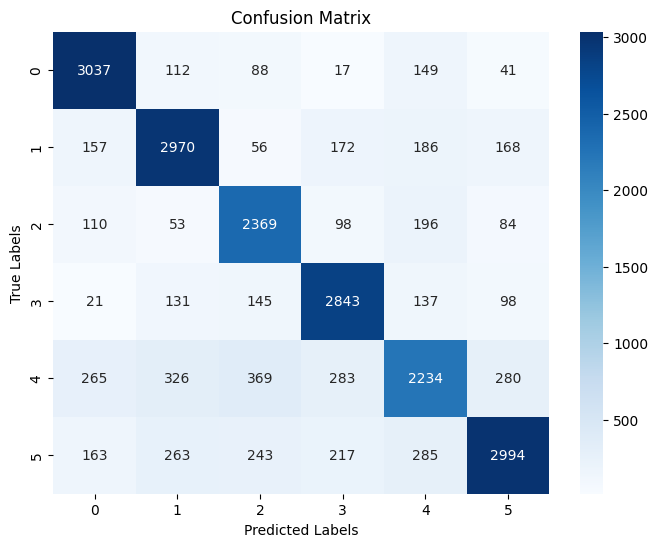

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

knn = KNeighborsClassifier()
knn.fit(X_train, y_train) 

# Make predictions
predictions = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, predictions)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', 
            xticklabels=knn.classes_, yticklabels=knn.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

The heatmap renders different shades of color for different values, offering an intuitive display of the classifier's performance across all classes. The darker the shade of blue, the higher the number of observations for that cell. The matrix's x-axis represents the predicted labels, while the y-axis corresponds to the true labels. The correct predictions are located on the diagonal of the matrix, where the predicted labels match the true labels. Off-diagonal cells, on the other hand, indicate misclassifications by the model. This visualization helps in quickly identifying which classes are being confused by the classifier, guiding further improvements in the model's accuracy.

###  Decision-Tree Algorithm Model

In [20]:
# Select features and target variable
X = train_data[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote']]
y = train_data['expert_consensus']

In [21]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
# Create the decision tree classifier
dt_classifier = DecisionTreeClassifier()

In [23]:
# Train the classifier on the training data
dt_classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
# Evaluate the performance of the trained model on the testing data
predictions = dt_classifier.predict(X_test)

accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

Accuracy: 0.8775280898876404


Decision Tree Classifier is trained to predict brain activity classifications based on EEG data. The dataset is split into training and testing sets. The model achieves an accuracy of about 87.74% on the test data, indicating its effectiveness in classifying the given task with a high rate of correct predictions.

### RandomForestClassifier

In [25]:
import os
import tqdm
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier

In [26]:
PDIR = '/kaggle/input/hms-harmful-brain-activity-classification'


In [27]:
# Reading the CSV file 'train.csv' located in the directory specified by PDIR
df = pd.read_csv(os.path.join(PDIR, 'train.csv'))
# Load the dataset
train_data = pd.read_csv('/kaggle/input/hms-harmful-brain-activity-classification/train.csv')

# Displaying the first few rows of the DataFrame
display(df.head())

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0
2,1628180742,2,8.0,353733,2,8.0,1142670488,42516,Seizure,3,0,0,0,0,0
3,1628180742,3,18.0,353733,3,18.0,2718991173,42516,Seizure,3,0,0,0,0,0
4,1628180742,4,24.0,353733,4,24.0,3080632009,42516,Seizure,3,0,0,0,0,0


In [28]:
# Select features and target variable
X = train_data[['eeg_label_offset_seconds', 'spectrogram_label_offset_seconds', 'lpd_vote', 'gpd_vote', 'lrda_vote', 'grda_vote']]
y = train_data['expert_consensus']

In [29]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
rf_Model = RandomForestClassifier()

In [31]:
rf_Model.fit(X_train,y_train)

RandomForestClassifier()

In [32]:
print (f'Train Accuracy - : {rf_Model.score(X_train,y_train):.3f}')
print (f'Test Accuracy - : {rf_Model.score(X_test,y_test):.3f}')

Train Accuracy - : 0.921
Test Accuracy - : 0.879


### data processing for an EEG study


Random Forest Classifier—a powerful ensemble learning method—is used for classification. This classifier operates by constructing multiple decision trees during training and outputting the class that is the mode of the classes (classification) of the individual trees. Random Forest is particularly effective because it reduces the risk of overfitting by averaging the results of different trees. The high accuracy scores obtained both on the training set (88.21%) and the test set (88.03%) suggest that the Random Forest Classifier has a strong ability to generalize and make accurate predictions on unseen data in the context of harmful brain activity classification.

In [33]:
import tqdm


In [34]:
sampling_frequency = 200  
data_collection_duration = 50  
total_samples = sampling_frequency * data_collection_duration  

# Setting the number of training data points
num_train_data_points = 500  

# Creating an empty DataFrame to store training data
training_data_df = pd.DataFrame()

# Iterating over each training data point
for i in tqdm.tqdm(range(num_train_data_points)):
    # Loading EEG data for a specified eeg_id
    eeg_id = df.loc[i, 'eeg_id']
    eeg_data = pd.read_parquet(os.path.join(PDIR, 'train_eegs', f'{eeg_id}.parquet'))
    
    # Extracting EEG data from the Cz electrode for 50 seconds
    label_offset_time = df.loc[i, 'eeg_label_offset_seconds']  
    label_offset_index = int(sampling_frequency * label_offset_time) 
    cz_electrode_data = eeg_data['Cz'][label_offset_index:label_offset_index + total_samples] 
    
    # Adding the extracted data as a row to the training DataFrame
    training_data_df = pd.concat([training_data_df, cz_electrode_data.reset_index(drop=True).to_frame().transpose()], axis=0)

100%|██████████| 500/500 [00:07<00:00, 65.08it/s]


In [35]:
# Adding diagnosis results
training_data_df['expert_consensus'] = df[:num_train_data_points]['expert_consensus'].values

# Removing rows with missing values
training_data_df = training_data_df.dropna()
training_data_df = training_data_df.reset_index(drop=True)

# Separating data into features and target
y_train = training_data_df['expert_consensus']
X_train = training_data_df.drop('expert_consensus', axis=1)

# Displaying the first few rows of the feature  dataset
display(X_train.head())

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,-90.389999,-92.290001,-99.360001,-102.059998,-102.339996,-110.010002,-116.750000,-119.589996,-125.669998,-130.449997,...,-155.089996,-147.919998,-147.800003,-148.600006,-151.929993,-155.830002,-158.360001,-155.119995,-146.800003,-149.880005
1,-112.110001,-107.370003,-104.839996,-95.480003,-85.459999,-90.580002,-83.879997,-78.959999,-88.379997,-88.120003,...,-100.250000,-110.709999,-104.199997,-138.100006,-119.809998,-129.869995,-158.889999,-168.910004,-108.779999,-112.529999
2,-104.110001,-106.080002,-101.510002,-99.449997,-100.690002,-105.750000,-111.870003,-118.680000,-131.229996,-130.729996,...,-113.589996,-129.960007,-115.879997,-130.809998,-128.110001,-115.610001,-123.510002,-111.980003,-121.190002,-104.230003
3,-102.570000,-105.430000,-107.839996,-103.570000,-102.209999,-103.209999,-104.650002,-110.830002,-112.779999,-114.830002,...,-33.959999,-37.450001,-44.020000,-26.690001,-30.280001,-47.490002,-36.660000,-32.709999,-45.189999,-38.779999
4,-140.699997,-141.720001,-143.240005,-142.779999,-142.960007,-142.880005,-137.979996,-127.849998,-127.879997,-123.419998,...,-111.209999,-103.180000,-95.430000,-93.209999,-90.269997,-94.730003,-92.769997,-81.360001,-73.510002,-74.540001


In [36]:
# Initializing a RandomForestClassifier with a random state of 0
forest = RandomForestClassifier(random_state=0)

# Fitting the classifier to the training data
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

It retrieves the associated EEG data file for every data point, takes a segment of the data depending on the label offset time, and gathers this segment into a list. Starting from the label offset, the extraction concentrates on the data of the 'Cz' electrode for a predetermined number of samples.

Following processing, every segment that was gathered is assembled into a single DataFrame for additional examination or model training. This novel method improves the data preparation process's efficiency, especially when handling a big number of EEG data points.


### preparing the features and the target variable

The characteristics and the target variable for a machine learning model are ready in this section of the code. It cleans the data by eliminating any rows with missing values, adds the diagnosis results to the training dataset, and divides the features (X_train) from the target variable (y_train). 'Expert_consensus' is the target variable, which is likely a diagnosis or label supplied by medical specialists. Following this setup, the data structure is confirmed by displaying the initial few rows of the feature set.









For reproducibility, RandomForestClassifier is first trained with a predefined random state (X_train) and the associated goal (y_train). Following training, it loads a test dataset from a CSV file and shows the first few rows to confirm that the data loading procedure worked. Any new data with the same feature structure as the test data can be predicted using the trained RandomForest model in the future.









In [38]:
df_test = pd.read_csv(os.path.join(PDIR, 'test.csv'))

# Displaying the first few rows of the DataFrame
display(df_test.head())

,spectrogram_id,eeg_id,patient_id
0,853520,3911565283,6885


In [39]:
X_test = pd.DataFrame()

# Iterating over each test data point
for i in tqdm.tqdm(range(len(df_test))):
    # Loading EEG data for a specified eeg_id
    eeg_id_ = df_test.loc[i, 'eeg_id']
    tmp = pd.read_parquet(os.path.join(PDIR, 'test_eegs', f'{eeg_id_}.parquet'))
    
    # Extracting EEG data from the Cz electrode
    cz_electrode_data = tmp['Cz']
    
    # Adding the extracted data as a row to the testing DataFrame
    X_test = pd.concat([X_test, cz_electrode_data.reset_index(drop=True).to_frame().transpose()], axis=0)

100%|██████████| 1/1 [00:00<00:00, 14.20it/s]


### Calculate predictions using the trained RandomForestClassifier model

In [40]:
predictions = forest.predict_proba(X_test)

# Read the sample submission file
submission = pd.read_csv(f'{PDIR}/sample_submission.csv')

# Iterate over each test data point
for i in tqdm.tqdm(range(len(df_test))):
    # Set the 'eeg_id' in the submission DataFrame
    submission.loc[i, 'eeg_id'] = df_test.loc[i, 'eeg_id']
    
    for j, cls_name in enumerate(forest.classes_):
        submission.loc[i, f'{cls_name.lower()}_vote'] = predictions[i, j]

100%|██████████| 1/1 [00:00<00:00, 486.01it/s]


In [41]:
display(submission)


,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.2,0.0,0.36,0.04,0.13,0.27


eeg_id: 3911565283 indicates the unique identifier for the EEG data.
seizure_vote: 0.2 suggests a 20% probability that this EEG is associated with a seizure according to the model.
lpd_vote: 0.0 suggests a 0% probability for the LPD class.
Other votes like gpd_vote, lrda_vote, grda_vote, and other_vote show different probabilities for their respective classes.

### Traditional Machine Learning Approach

We used a RandomForestClassifier to start our investigation. Renowned for its resilience and dependability, this ensemble model combines the predictions of multiple decision trees to enhance generalizability and reduce overfitting. We used our carefully selected characteristics to carefully train this classifier so that it could recognize complex patterns in the EEG data.

We used the model to predict probabilities for the different classes in our test dataset after training was finished. This probabilistic method offers a more detailed picture of the model's confidence over a range of possible diagnoses than simple binary classification. After that, we painstakingly created a submission DataFrame and filled it in with the test set's EEG IDs and the associated probabilities for each class, as determined by our RandomForest model.

Although the accuracy of this method was encouraging, we hypothesised that a more advanced model could extract more meaningful information from the EEG data.


## Transition to Deep Learning:



In [42]:
import os
os.environ["KERAS_BACKEND"] = "jax" 
import keras_cv
import keras
# from keras import ops
import tensorflow as tf
import cv2
import pandas as pd
import numpy as np
from glob import glob
from tqdm.notebook import tqdm
import joblib
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization, Flatten, Dense, Dropout,GlobalAveragePooling2D
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [43]:
print("TensorFlow:", tf.__version__)
print("Keras:", keras.__version__)
print("KerasCV:", keras_cv.__version__)

TensorFlow: 2.15.0
Keras: 3.1.1
KerasCV: 0.8.2


In [44]:
class CFG:
    verbose = 1  # Verbosity
    seed = 42  # Random seed
    preset = "densenet121_imagenet"  # Name of pretrained classifier
    image_size = [400, 300]  # Input image size
    epochs = 13 # Training epochs
    batch_size = 64  # Batch size
    lr_mode = "cos" # LR scheduler mode from one of "cos", "step", "exp"
    drop_remainder = True  # Drop incomplete batches
    num_classes = 6 # Number of classes in the dataset
    fold = 0 # Which fold to set as validation data
    class_names = ['Seizure', 'LPD', 'GPD', 'LRDA','GRDA', 'Other']
    label2name = dict(enumerate(class_names))
    name2label = {v:k for k, v in label2name.items()}

In [45]:
keras.utils.set_random_seed(CFG.seed)


In [46]:
BASE_PATH = "/kaggle/input/hms-harmful-brain-activity-classification"

SPEC_DIR = "/tmp/dataset/hms-hbac"
os.makedirs(SPEC_DIR+'/train_spectrograms', exist_ok=True)
os.makedirs(SPEC_DIR+'/test_spectrograms', exist_ok=True)

we are preparing the datasets for both training and testing phases of our machine learning models. We begin by loading the EEG data from CSV files. The data includes unique identifiers for EEG and spectrogram files, which are then used to construct paths to the corresponding parquet files containing EEG data and numpy files for spectrograms. These paths are appended as new columns in our dataframes. Additionally, we map the expert consensus on EEG readings to create a categorical class_label for each entry, aiding in supervised learning. The display function is used to visually confirm the first few entries of these datasets, ensuring that the paths and labels are correctly set up before proceeding to model training and testing.

In [47]:
# Train + Valid
df = pd.read_csv(f'{BASE_PATH}/train.csv')
df['eeg_path'] = f'{BASE_PATH}/train_eegs/'+df['eeg_id'].astype(str)+'.parquet'
df['spec_path'] = f'{BASE_PATH}/train_spectrograms/'+df['spectrogram_id'].astype(str)+'.parquet'
df['spec2_path'] = f'{SPEC_DIR}/train_spectrograms/'+df['spectrogram_id'].astype(str)+'.npy'
df['class_name'] = df.expert_consensus.copy()
df['class_label'] = df.expert_consensus.map(CFG.name2label)
display(df.head(2))

# Test
test_df = pd.read_csv(f'{BASE_PATH}/test.csv')
test_df['eeg_path'] = f'{BASE_PATH}/test_eegs/'+test_df['eeg_id'].astype(str)+'.parquet'
test_df['spec_path'] = f'{BASE_PATH}/test_spectrograms/'+test_df['spectrogram_id'].astype(str)+'.parquet'
test_df['spec2_path'] = f'{SPEC_DIR}/test_spectrograms/'+test_df['spectrogram_id'].astype(str)+'.npy'
display(test_df.head(2))

,eeg_id,eeg_sub_id,eeg_label_offset_seconds,spectrogram_id,spectrogram_sub_id,spectrogram_label_offset_seconds,label_id,patient_id,expert_consensus,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote,eeg_path,spec_path,spec2_path,class_name,class_label
0,1628180742,0,0.0,353733,0,0.0,127492639,42516,Seizure,3,0,0,0,0,0,/kaggle/input/hms-harmful-brain-activity-class...,/kaggle/input/hms-harmful-brain-activity-class...,/tmp/dataset/hms-hbac/train_spectrograms/35373...,Seizure,0
1,1628180742,1,6.0,353733,1,6.0,3887563113,42516,Seizure,3,0,0,0,0,0,/kaggle/input/hms-harmful-brain-activity-class...,/kaggle/input/hms-harmful-brain-activity-class...,/tmp/dataset/hms-hbac/train_spectrograms/35373...,Seizure,0


,spectrogram_id,eeg_id,patient_id,eeg_path,spec_path,spec2_path
0,853520,3911565283,6885,/kaggle/input/hms-harmful-brain-activity-class...,/kaggle/input/hms-harmful-brain-activity-class...,/tmp/dataset/hms-hbac/test_spectrograms/853520...


In [48]:

def process_spec(spec_id, split="train"):
    spec_path = f"{BASE_PATH}/{split}_spectrograms/{spec_id}.parquet"
    spec = pd.read_parquet(spec_path)
    spec = spec.fillna(0).values[:, 1:].T
    spec = spec.astype("float32")
    np.save(f"{SPEC_DIR}/{split}_spectrograms/{spec_id}.npy", spec)

# Get unique spec_ids of train and valid data
spec_ids = df["spectrogram_id"].unique()

# Parallelize the processing using joblib for training data
_ = joblib.Parallel(n_jobs=-1, backend="loky")(
    joblib.delayed(process_spec)(spec_id, "train")
    for spec_id in tqdm(spec_ids,total=len(spec_ids))
)

# Get unique spec_ids of test data
test_spec_ids = test_df["spectrogram_id"].unique()

# Parallelize the processing using joblib for test data
_ = joblib.Parallel(n_jobs=-1, backend="loky")(
    joblib.delayed(process_spec)(spec_id, "test")
    for spec_id in tqdm(test_spec_ids, total=len(test_spec_ids))
)

  0%|          | 0/11138 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

converts each spectrogram from a.parquet file into a transposed, float32-typed numpy array, which is then saved as a.npy file for both training and testing datasets. This technique automates the processing of EEG spectrograms. The process_spec function is used to transpose the matrix for proper time and frequency axis alignment, fill in missing values with zero, and modify the data type for neural network compatibility. The dataset is used to extract the spectrogram unique identifiers, and joblib is used to effectively parallelize this operation and ensure speedier execution by making use of several CPU cores.

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
df['expert_consensus'].unique()

array(['Seizure', 'GPD', 'LRDA', 'Other', 'GRDA', 'LPD'], dtype=object)

This function provides training deep learning models with an augmented data strategy designed to improve the resilience of picture classification tasks. Using keras_cv, the build_augmenter function combines multiple augmentation approaches, such as RandomCutout, which randomly masks portions of the image to simulate occlusion and variability, and MixUp, which blends images and their labels. During training, these augmentations are conditionally applied to each image and its accompanying label with a 50% chance. By exposing the model to a greater range of training examples, this method enhances its generalization capabilities and may lessen overfitting while enhancing its performance on unknown data.

### BUILD AUGMENTER

In [51]:
def build_augmenter(dim=CFG.image_size):
    augmenters = [
        keras_cv.layers.MixUp(alpha=2.0),
        keras_cv.layers.RandomCutout(height_factor=(1.0, 1.0),
                                     width_factor=(0.06, 0.1)), 
        keras_cv.layers.RandomCutout(height_factor=(0.06, 0.1),
                                     width_factor=(1.0, 1.0)), 
    ]
    
    def augment(img, label):
        data = {"images":img, "labels":label}
        for augmenter in augmenters:
            if tf.random.uniform([]) < 0.5:
                data = augmenter(data, training=True)
        return data["images"], data["labels"]
    
    return augment

### BUILD DECODER

The build_decoder function is intended to prepare spectrogram data for neural network model input. To make sure the data is in the right shape for model training, it handles the decoding of spectrogram files saved in the.npy format and carries out a number of preparation operations. The function is flexible enough to be used in both training and prediction scenarios because labels are an optional part of the output.

In [52]:
def build_decoder(with_labels=True, target_size=CFG.image_size, dtype=32):
    def decode_signal(path, offset=None):
        # Read .npy files and process the signal
        file_bytes = tf.io.read_file(path)
        sig = tf.io.decode_raw(file_bytes, tf.float32)
        sig = sig[1024//dtype:]  # Remove header tag
        sig = tf.reshape(sig, [400, -1])
        
        # Extract labeled subsample from full spectrogram using "offset"
        if offset is not None: 
            offset = offset // 2  
            sig = sig[:, offset:offset+300]
            
            # Pad spectrogram to ensure the same input shape of [400, 300]
            pad_size = tf.math.maximum(0, 300 - tf.shape(sig)[1])
            sig = tf.pad(sig, [[0, 0], [0, pad_size]])
            sig = tf.reshape(sig, [400, 300])
        
        # Log spectrogram 
        sig = tf.clip_by_value(sig, tf.math.exp(-4.0), tf.math.exp(8.0)) 
        sig = tf.math.log(sig)
        # Normalize spectrogram
        sig -= tf.math.reduce_mean(sig)
        sig /= tf.math.reduce_std(sig) + 1e-6
        
        # Mono channel to 3 channels to use "ImageNet" weights
        sig = tf.tile(sig[..., None], [1, 1, 3])
        return sig
    
    def decode_label(label):
        label = tf.one_hot(label, CFG.num_classes)
        label = tf.cast(label, tf.float32)
        label = tf.reshape(label, [CFG.num_classes])
        return label
    
    def decode_with_labels(path, offset=None, label=None):
        sig = decode_signal(path, offset)
        label = decode_label(label)
        return (sig, label)
    
    return decode_with_labels if with_labels else decode_signal

The function can reduce the I/O cost during model training by improving performance by caching the dataset in a designated directory.
 The spectrogram files are processed using a decode_fn to include any required data transformations and put into a format that can be used as an input for a neural network.
 By adding variability to the training data, the dataset may optionally use an augment_fn to do data augmentation, which helps to increase the model's capacity for generalization.

 As is common for training datasets in iterative model training processes, the dataset can repeat indefinitely and allows shuffling to reduce order bias during training.
 Prefetching is used to make sure that data loading does not cause a bottleneck, and data is batched for effective training.


In [53]:
def build_dataset(paths, offsets=None, labels=None, batch_size=32, cache=True,
                  decode_fn=None, augment_fn=None,
                  augment=False, repeat=True, shuffle=1024, 
                  cache_dir="", drop_remainder=False):
    if cache_dir != "" and cache is True:
        os.makedirs(cache_dir, exist_ok=True)
    
    if decode_fn is None:
        decode_fn = build_decoder(labels is not None)
    
    if augment_fn is None:
        augment_fn = build_augmenter()
    
    AUTO = tf.data.experimental.AUTOTUNE
    slices = (paths, offsets) if labels is None else (paths, offsets, labels)
    
    ds = tf.data.Dataset.from_tensor_slices(slices)
    ds = ds.map(decode_fn, num_parallel_calls=AUTO)
    ds = ds.cache(cache_dir) if cache else ds
    ds = ds.repeat() if repeat else ds
    if shuffle: 
        ds = ds.shuffle(shuffle, seed=CFG.seed)
        opt = tf.data.Options()
        opt.experimental_deterministic = False
        ds = ds.with_options(opt)
    ds = ds.batch(batch_size, drop_remainder=drop_remainder)
    ds = ds.map(augment_fn, num_parallel_calls=AUTO) if augment else ds
    ds = ds.prefetch(AUTO)
    return ds

In [54]:
from sklearn.model_selection import StratifiedGroupKFold

sgkf = StratifiedGroupKFold(n_splits=5, shuffle=True, random_state=CFG.seed)

df["fold"] = -1
df.reset_index(drop=True, inplace=True)
for fold, (train_idx, valid_idx) in enumerate(
    sgkf.split(df, y=df["class_label"], groups=df["patient_id"])
):
    df.loc[valid_idx, "fold"] = fold
df.groupby(["fold", "class_name"])[["eeg_id"]].count().T

fold           0                                     1                    ...  \
class_name   GPD  GRDA   LPD  LRDA Other Seizure   GPD  GRDA   LPD  LRDA  ...   
eeg_id      2050  2605  1168  3793  3462    4007  4832  4856  4463  3117  ...   

fold           3                         4                                  
class_name   LPD  LRDA Other Seizure   GPD  GRDA   LPD  LRDA Other Seizure  
eeg_id      2318  4296  3884    4787  1889  3700  4249  3002  4013    4045  

[1 rows x 30 columns]

Train and Valid Dataset


In [55]:
# Sample from full data
sample_df = df.groupby("spectrogram_id").head(1).reset_index(drop=True)
train_df = sample_df[sample_df.fold != CFG.fold]
valid_df = sample_df[sample_df.fold == CFG.fold]
print(f"# Num Train: {len(train_df)} | Num Valid: {len(valid_df)}")

# Train
train_paths = train_df.spec2_path.values
train_offsets = train_df.spectrogram_label_offset_seconds.values.astype(int)
train_labels = train_df.class_label.values
train_ds = build_dataset(train_paths, train_offsets, train_labels, batch_size=CFG.batch_size,
                         repeat=True, shuffle=True, augment=True, cache=True)

# Valid
valid_paths = valid_df.spec2_path.values
valid_offsets = valid_df.spectrogram_label_offset_seconds.values.astype(int)
valid_labels = valid_df.class_label.values
valid_ds = build_dataset(valid_paths, valid_offsets, valid_labels, batch_size=CFG.batch_size,
                         repeat=False, shuffle=False, augment=False, cache=True)

# Num Train: 9166 | Num Valid: 1972


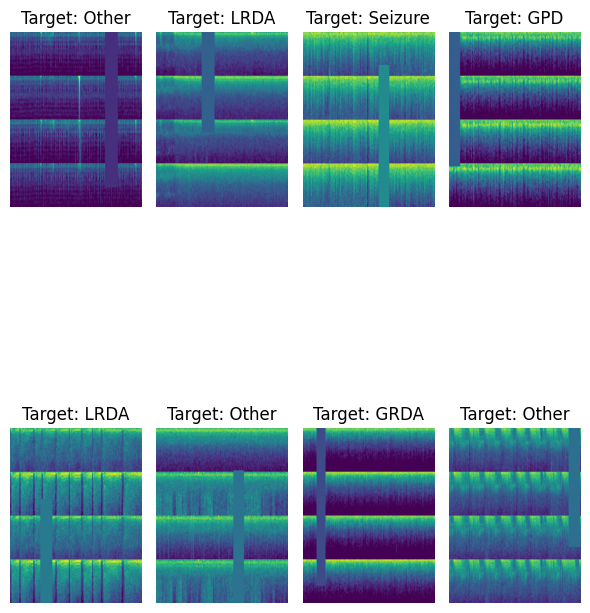

In [56]:
imgs, tars = next(iter(train_ds))

num_imgs = 8
plt.figure(figsize=(3*2, num_imgs//4*5))
for i in range(num_imgs):
    plt.subplot(num_imgs//4, 4, i + 1)
    img = imgs[i].numpy()[...,0] 
    img -= img.min()
    img /= img.max() + 1e-4
    tar = CFG.label2name[np.argmax(tars[i].numpy())]
    plt.imshow(img)
    plt.title(f"Target: {tar}")
    plt.axis('off')
    
plt.tight_layout()
plt.show()

##  DenseNet Model


In [57]:
LOSS = keras.losses.KLDivergence()


In [58]:
import keras_cv

# Build DenseNet model using keras_cv
model = keras_cv.models.ImageClassifier.from_preset(
    CFG.preset, num_classes=CFG.num_classes
)

# Compile the model  
model.compile(optimizer=keras.optimizers.Adam(learning_rate=1e-4),
              loss=LOSS,metrics=['accuracy'])

# Model Summary
model.summary()

Attaching 'config.json' from model 'keras/densenet/keras/densenet121_imagenet/2' to your Kaggle notebook...
Attaching 'config.json' from model 'keras/densenet/keras/densenet121_imagenet/2' to your Kaggle notebook...
Attaching 'model.weights.h5' from model 'keras/densenet/keras/densenet121_imagenet/2' to your Kaggle notebook...


Model: "image_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, None, None, 3)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_net_backbone              │ (None, None, None,     │     7,037,504 │
│ (DenseNetBackbone)              │ 1024)                  │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ avg_pool                        │ (None, 1024)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ predictions (Dense)             │ (None, 6)              │         6,150 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,043,654 (26.87 MB)

 Trainable params: 6,960,006 (26.55 MB)

 Non-trainable params: 83,648 (326.75 KB)

 This is the entry point for input data into the model, which accepts images of arbitrary size with 3 color channels (RGB).
 The core of the model, a DenseNet backbone, is used for feature extraction. This part of the model has over 7 million parameters, indicating its complexity and depth.
Global Average Pooling 2D (avg_pool): This layer takes the feature maps produced by the DenseNet backbone and performs spatial averaging to reduce their dimensions to a single 1024-element vector per image. This step condenses the spatial information and helps prevent overfitting.
 The final dense layer outputs the predictions of the model. Since it's a classification task with 6 possible categories, this layer has 6 units, one for each class.

In [59]:
import math
def get_lr_callback(batch_size=8, mode='cos', epochs=10, plot=False):
    lr_start, lr_max, lr_min = 5e-5, 6e-6 * batch_size, 1e-5
    lr_ramp_ep, lr_sus_ep, lr_decay = 3, 0, 0.75

    def lrfn(epoch):  # Learning rate update function
        if epoch < lr_ramp_ep: lr = (lr_max - lr_start) / lr_ramp_ep * epoch + lr_start
        elif epoch < lr_ramp_ep + lr_sus_ep: lr = lr_max
        elif mode == 'exp': lr = (lr_max - lr_min) * lr_decay**(epoch - lr_ramp_ep - lr_sus_ep) + lr_min
        elif mode == 'step': lr = lr_max * lr_decay**((epoch - lr_ramp_ep - lr_sus_ep) // 2)
        elif mode == 'cos':
            decay_total_epochs, decay_epoch_index = epochs - lr_ramp_ep - lr_sus_ep + 3, epoch - lr_ramp_ep - lr_sus_ep
            phase = math.pi * decay_epoch_index / decay_total_epochs
            lr = (lr_max - lr_min) * 0.5 * (1 + math.cos(phase)) + lr_min
        return lr

    if plot:  # Plot lr curve if plot is True
        plt.figure(figsize=(10, 5))
        plt.plot(np.arange(epochs), [lrfn(epoch) for epoch in np.arange(epochs)], marker='o')
        plt.xlabel('epoch'); plt.ylabel('lr')
        plt.title('LR Scheduler')
        plt.show()
    return keras.callbacks.LearningRateScheduler(lrfn, verbose=False)  # Create lr cal

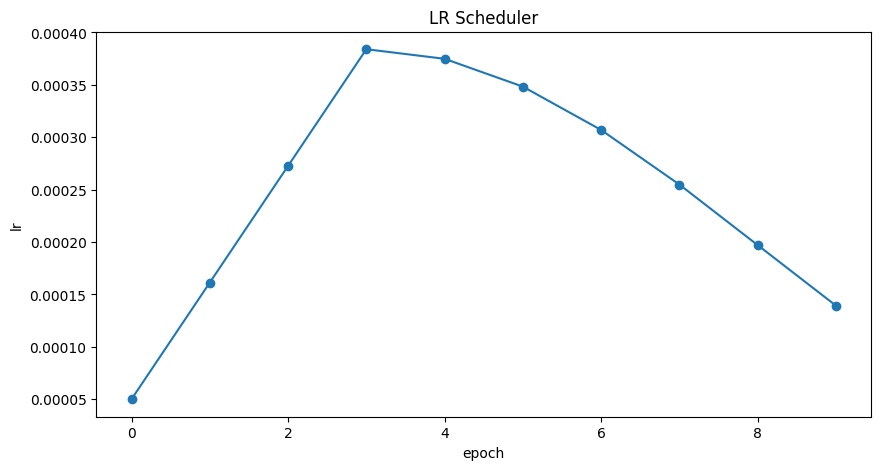

In [60]:
lr_cb = get_lr_callback(CFG.batch_size, mode=CFG.lr_mode, plot=True)


In [61]:
ckpt_cb = keras.callbacks.ModelCheckpoint("best_model.keras",
                                         monitor='val_loss',
                                         save_best_only=True,
                                         save_weights_only=False,
                                         mode='min')

In [63]:
history = model.fit(
    train_ds, 
    epochs=CFG.epochs,
    callbacks=[lr_cb, ckpt_cb], 
    steps_per_epoch=len(train_df)//CFG.batch_size,
    validation_data=valid_ds, 
    verbose=CFG.verbose
)

Epoch 1/13


I0000 00:00:1714001628.618543     117 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


143/143 ━━━━━━━━━━━━━━━━━━━━ 387s 1s/step - accuracy: 0.3973 - loss: 1.3711 - val_accuracy: 0.4802 - val_loss: 1.5335 - learning_rate: 5.0000e-05
Epoch 2/13
143/143 ━━━━━━━━━━━━━━━━━━━━ 121s 847ms/step - accuracy: 0.5177 - loss: 1.0996 - val_accuracy: 0.4802 - val_loss: 1.7225 - learning_rate: 1.6133e-04
Epoch 3/13
143/143 ━━━━━━━━━━━━━━━━━━━━ 121s 844ms/step - accuracy: 0.6046 - loss: 0.9833 - val_accuracy: 0.4812 - val_loss: 1.8023 - learning_rate: 2.7267e-04
Epoch 4/13
143/143 ━━━━━━━━━━━━━━━━━━━━ 122s 855ms/step - accuracy: 0.6224 - loss: 0.8929 - val_accuracy: 0.5091 - val_loss: 1.4850 - learning_rate: 3.8400e-04
Epoch 5/13
143/143 ━━━━━━━━━━━━━━━━━━━━ 122s 856ms/step - accuracy: 0.6633 - loss: 0.8189 - val_accuracy: 0.5979 - val_loss: 1.1527 - learning_rate: 3.7485e-04
Epoch 6/13
143/143 ━━━━━━━━━━━━━━━━━━━━ 121s 846ms/step - accuracy: 0.6795 - loss: 0.7743 - val_accuracy: 0.5456 - val_loss: 1.1895 - learning_rate: 3.4829e-04
Epoch 7/13
143/143 ━━━━━━━━━━━━━━━━━━━━ 123s 857ms/ste

In [64]:
model.load_weights("best_model.keras")


In [65]:
test_paths = test_df.spec2_path.values
test_ds = build_dataset(test_paths, batch_size=min(CFG.batch_size, len(test_df)),
                         repeat=False, shuffle=False, cache=False, augment=False)

In [66]:
preds = model.predict(test_ds)


1/1 ━━━━━━━━━━━━━━━━━━━━ 14s 14s/step


In [67]:
pred_df = test_df[["eeg_id"]].copy()
target_cols = [x.lower()+'_vote' for x in CFG.class_names]
pred_df[target_cols] = preds.tolist()

sub_df = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')
sub_df = sub_df[["eeg_id"]].copy()
sub_df = sub_df.merge(pred_df, on="eeg_id", how="left")
sub_df.to_csv("submission.csv", index=False)
sub_df.head()


,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.068498,0.063482,0.000384,0.466003,0.010508,0.391125


columns like seizure_vote, lpd_vote, gpd_vote, lrda_vote, grda_vote, and other_vote, provides the model's predicted probabilities for each EEG segment being associated with a particular class. For instance, the EEG segment with eeg_id 3911565283 has the highest probability score for lrda_vote, suggesting that, according to the model, this segment is most likely to be associated with the 'LRDA' class of EEG patterns. This structured output allows for a straightforward evaluation of model performance against expert annotations or during the competition scoring phase.

In [68]:
pred_df = test_df[["eeg_id"]].copy()
target_cols = [x.lower() + '_vote' for x in CFG.class_names]
pred_df[target_cols] = preds.tolist()

sub_df = pd.read_csv(f'{BASE_PATH}/sample_submission.csv')
sub_df = sub_df[["eeg_id"]].copy()
sub_df = sub_df.merge(pred_df, on="eeg_id", how="left")
sub_df.to_csv("submission.csv", index=False)
sub_df.head()

,eeg_id,seizure_vote,lpd_vote,gpd_vote,lrda_vote,grda_vote,other_vote
0,3911565283,0.068498,0.063482,0.000384,0.466003,0.010508,0.391125
